In [79]:
import numpy as np
import scipy as sp
import arviz as az
from src.baseSIR import mle
from src.baseSIR import mle_sir
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import time

In [80]:
g_state = ["fixed","free"]
sim_g = g_state[0]
extra = ["","_I1","_I2"]
I0 = extra[2]
R0 = 3

In [81]:
Size_c0 = pd.DataFrame(np.genfromtxt(f"../../Data/R0_{R0}/Sims_SIR/Summary/{sim_g}_g_Final_size{I0}_c0_{R0}.csv", delimiter= ","), columns = ("S","N"))
Size_c1 = pd.DataFrame(np.genfromtxt(f"../../Data/R0_{R0}/Sims_SIR/Summary/{sim_g}_g_Final_size{I0}_c1_{R0}.csv", delimiter= ","), columns = ("S","N"))
Size_c2 = pd.DataFrame(np.genfromtxt(f"../../Data/R0_{R0}/Sims_SIR/Summary/{sim_g}_g_Final_size{I0}_c2_{R0}.csv", delimiter= ","), columns = ("S","N"))
Size_c3 = pd.DataFrame(np.genfromtxt(f"../../Data/R0_{R0}/Sims_SIR/Summary/{sim_g}_g_Final_size{I0}_c3_{R0}.csv", delimiter= ","), columns = ("S","N"))

Ext_c0 = pd.DataFrame(np.genfromtxt(f"../../Data/R0_{R0}/Sims_SIR/Summary/{sim_g}_g_Pr_ext{I0}_c0_{R0}.csv", delimiter= ","),columns = ("S","N"))
Ext_c1 = pd.DataFrame(np.genfromtxt(f"../../Data/R0_{R0}/Sims_SIR/Summary/{sim_g}_g_Pr_ext{I0}_c1_{R0}.csv", delimiter= ","), columns = ("S","N"))
Ext_c2 = pd.DataFrame(np.genfromtxt(f"../../Data/R0_{R0}/Sims_SIR/Summary/{sim_g}_g_Pr_ext{I0}_c2_{R0}.csv", delimiter= ","), columns = ("S","N"))
Ext_c3 = pd.DataFrame(np.genfromtxt(f"../../Data/R0_{R0}/Sims_SIR/Summary/{sim_g}_g_Pr_ext{I0}_c3_{R0}.csv", delimiter= ","), columns = ("S","N"))

Std_c0 = pd.DataFrame(np.genfromtxt(f"../../Data/R0_{R0}/Sims_SIR/Summary/{sim_g}_g_Stds{I0}_c0_{R0}.csv", delimiter= ","),columns = ("S","N"))
Std_c1 = pd.DataFrame(np.genfromtxt(f"../../Data/R0_{R0}/Sims_SIR/Summary/{sim_g}_g_Stds{I0}_c1_{R0}.csv", delimiter= ","), columns = ("S","N"))
Std_c2 = pd.DataFrame(np.genfromtxt(f"../../Data/R0_{R0}/Sims_SIR/Summary/{sim_g}_g_Stds{I0}_c2_{R0}.csv", delimiter= ","), columns = ("S","N"))
Std_c3 = pd.DataFrame(np.genfromtxt(f"../../Data/R0_{R0}/Sims_SIR/Summary/{sim_g}_g_Stds{I0}_c3_{R0}.csv", delimiter= ","), columns = ("S","N"))

In [82]:
print(Size_c0)

             S       N
0   312.790698    10.0
1   339.000000    10.0
2   609.493671    10.0
3   382.352941    10.0
4   343.750000    10.0
5   733.057851    10.0
6   764.135021    10.0
7   345.544554    10.0
8   339.772727    10.0
9   771.595331    10.0
10  731.640927   100.0
11  666.428571   100.0
12  666.511628   100.0
13  659.979716   100.0
14  483.560209   100.0
15  701.533742   100.0
16  623.720930   100.0
17  637.090069   100.0
18  653.425926   100.0
19  755.143403   100.0
20  907.466981  1000.0
21  941.712166  1000.0
22  927.954198  1000.0
23  938.748872  1000.0
24  934.469265  1000.0
25  936.646018  1000.0
26  960.329167  1000.0
27  923.437500  1000.0
28  943.517139  1000.0
29  951.320567  1000.0


In [83]:
b_mod = 0.5
omega = 1
cull_strength = 20

In [84]:
Size_c0["C"] = "No Control"
Size_c1["C"] = f"Reduction in Beta: {b_mod}*B"
Size_c2["C"] = f"Additive Gamma: Gamma + {omega}"
Size_c3["C"] = f"{cull_strength}% Cull every 0.5 Time Units"

Ext_c0["C"] = "No Control"
Ext_c1["C"] = f"Reduction in Beta: {b_mod}*B"
Ext_c2["C"] = f"Additive Gamma: Gamma + {omega}"
Ext_c3["C"] = f"{cull_strength}% Cull every 0.5 Time Units"

Std_c0["C"] = "No Control"
Std_c1["C"] = f"Reduction in Beta: {b_mod}*B"
Std_c2["C"] = f"Additive Gamma: Gamma + {omega}"
Std_c3["C"] = f"{cull_strength}% Cull every 0.5 Time Units"

Sizes = pd.concat([Size_c0,Size_c1,Size_c2,Size_c3])

Exts = pd.concat([Ext_c0,Ext_c1,Ext_c2,Ext_c3])

Stds = pd.concat([Std_c0,Std_c1,Std_c2,Std_c3])

In [85]:
from src.baseSIR import no_ext_sir
mu = 0
tmax = 11.05
tstep = 0.05
real_sizes = []
for i in range(10):

    seed  = i
    X0 = [999, 1, 0]
    rng = np.random.default_rng(seed)
    s = no_ext_sir(X0,mu,3,1,tmax,tstep,rng)
    real_sizes.append(s[-1][2])

C:\Users\ollie\AppData\Local\Temp\ipykernel_14240\294043853.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


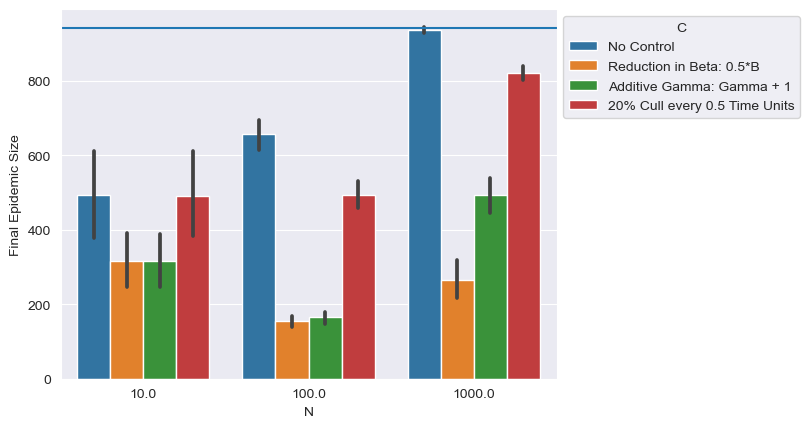

In [86]:
fig, ax0 = plt.subplots()
sns.barplot(data = Sizes, x = "N", y = "S", hue = "C", ax = ax0)
sns.move_legend(ax0, "upper left", bbox_to_anchor=(1, 1))
ax0.axhline(np.mean(real_sizes))
ax0.set_xlabel("N")
ax0.set_ylabel("Final Epidemic Size")
fig.show()

C:\Users\ollie\AppData\Local\Temp\ipykernel_14240\2267126336.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


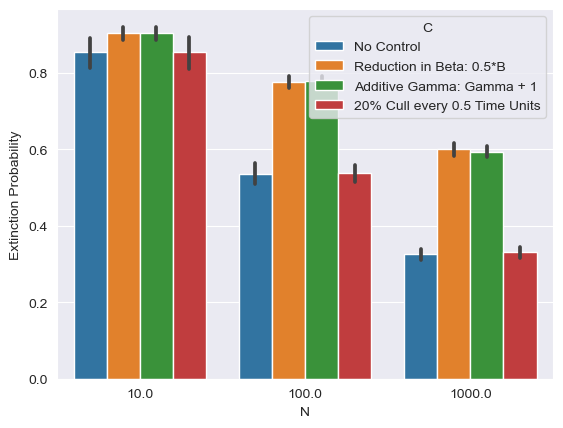

In [87]:
fig, ax0 = plt.subplots()
sns.barplot(data = Exts, x = "N", y = "S", hue = "C", ax = ax0)
ax0.set_xlabel("N")
ax0.set_ylabel("Extinction Probability")
fig.show()

In [88]:
Size_c0[Size_c0["N"] == 10]["S"]

0    312.790698
1    339.000000
2    609.493671
3    382.352941
4    343.750000
5    733.057851
6    764.135021
7    345.544554
8    339.772727
9    771.595331
Name: S, dtype: float64

In [89]:
sp.stats.ttest_rel(Size_c0[Size_c0["N"] == 10]["S"], Size_c0[Size_c0["N"] == 1000]["S"])

TtestResult(statistic=-7.303083274723992, pvalue=4.5495837801347365e-05, df=9)

C:\Users\ollie\AppData\Local\Temp\ipykernel_14240\208500345.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


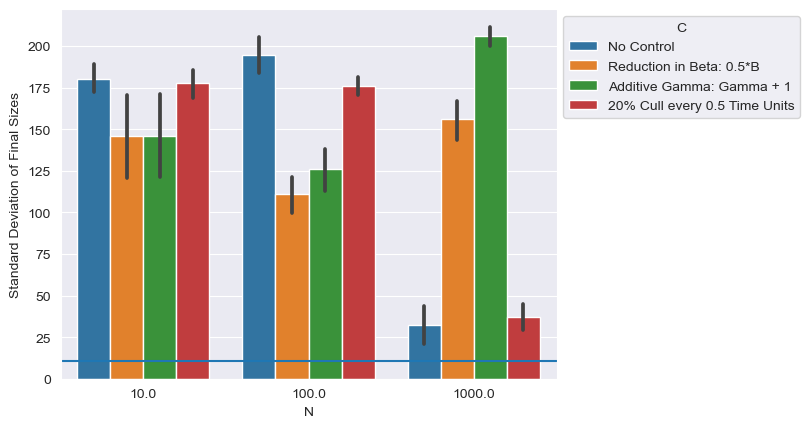

In [90]:
fig, ax0 = plt.subplots()
sns.barplot(data = Stds, x = "N", y = "S", hue = "C", ax = ax0)
sns.move_legend(ax0, "upper left", bbox_to_anchor=(1, 1))
ax0.axhline(np.std(real_sizes))
ax0.set_xlabel("N")
ax0.set_ylabel("Standard Deviation of Final Sizes")
fig.show()